In [1]:
import re

import pandas as pd
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
from nltk.corpus import stopwords
from pymongo import MongoClient

InteractiveShell.ast_node_interactivity = "all"

In [2]:
client = MongoClient("localhost:27017")
db = client["wallstreetbets"]
submission_records = db.submission_records
df = pd.DataFrame(
    list(
        submission_records.find(
            {
                "is_self_post": True,
                "is_removed_by_author": False,
                "is_removed_by_moderator": False,
                "selftext": {"$exists": True, "$ne": ""},
            }
        )
    )
)
df.columns
df.shape

Index(['_id', 'id', 'author', 'author_deleted', 'body_emoji', 'created_utc',
       'distinguished', 'edited_utc', 'is_edited', 'is_locked', 'is_nsfw',
       'is_original_content', 'is_removed_by_author',
       'is_removed_by_moderator', 'is_self_post', 'is_stickied',
       'link_flair_text', 'num_comments', 'permalink', 'score', 'selftext',
       'title', 'title_emoji', 'upvote_ratio', 'url', 'mbti', 'toxicity',
       'roberta-sentiment', 'hate-speech', 'toxicity_ensemble'],
      dtype='object')

(16459, 30)

In [3]:
df = df[["selftext"]]
type(df)
df.head()

pandas.core.frame.DataFrame

,selftext
0,The CEO of NASDAQ pushed to halt trading “to g...
1,You guys are champs. GME... who would have tho...
2,Your daily trading discussion thread. Please k...
3,I still remember when I first joined and most ...
4,https://youtu.be/BtjhgcAMYU0


In [4]:
stop_words = stopwords.words("english")
stop_words.extend(
    [
        "stock",
        "in",
        "re",
        "this",
        "price",
        "company",
        "like",
        "get",
        "share",
        "would",
        "think",
        "all",
        "could",
        "make",
        "market",
        "one",
        "best",
        "short",
        "it",
        "the",
        "share",
        "also",
        "see",
        "here",
        "look",
    ]
)

# Remove url links
df["selftext_processed"] = df["selftext"].map(
    lambda x: re.sub(
        "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", x
    )
)

# Remove spaces > 1
df["selftext_processed"] = df["selftext_processed"].map(lambda x: re.sub(" +", " ", x))

# Convert to lowercase
df["selftext_processed"] = df["selftext_processed"].map(lambda x: x.lower())

# Remove new line characters
df["selftext_processed"] = df["selftext_processed"].map(lambda x: re.sub("\s+", " ", x))

# Remove distracting single quotes
df["selftext_processed"] = df["selftext_processed"].map(lambda x: re.sub("'", "", x))

df.head()

,selftext,selftext_processed
0,The CEO of NASDAQ pushed to halt trading “to g...,the ceo of nasdaq pushed to halt trading “to g...
1,You guys are champs. GME... who would have tho...,you guys are champs. gme... who would have tho...
2,Your daily trading discussion thread. Please k...,your daily trading discussion thread. please k...
3,I still remember when I first joined and most ...,i still remember when i first joined and most ...
4,https://youtu.be/BtjhgcAMYU0,


/home/jason/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



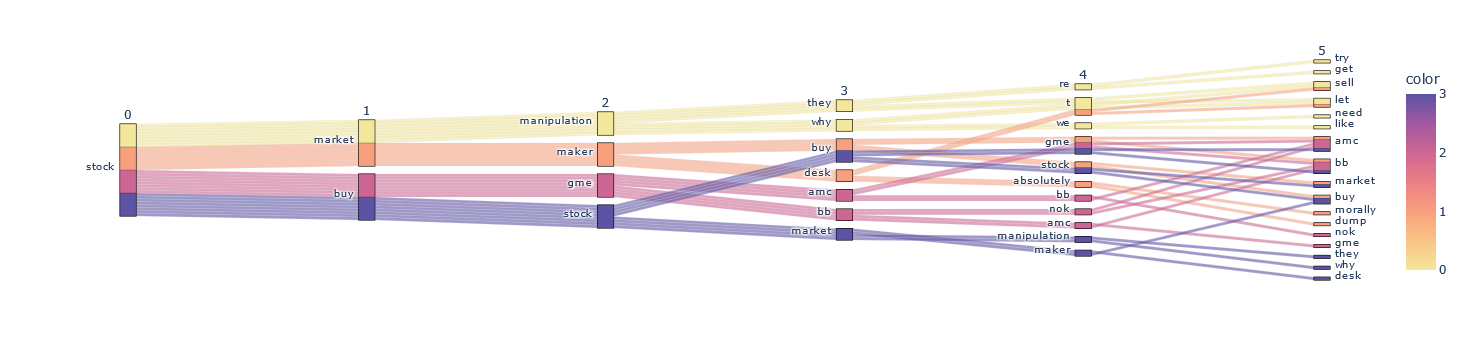

In [5]:
from word_viz import parallel_word_chart

parallel_word_chart(
    df.head(1000),
    "selftext",
    number_rows=2,
    number_cols=6,
    word="stock",
    preprocess_text=True,
)

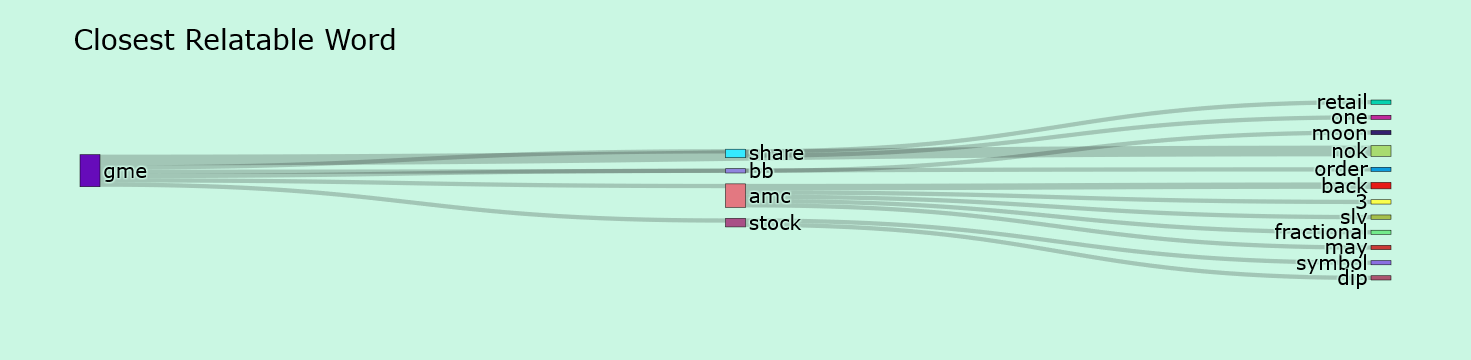

In [14]:
from word_viz import Link_Plot

Link_Plot(df.head(1000), "selftext", word="gme", preprocess_text=True)